Filtro espaciais Max,Min,Mediana e Moda

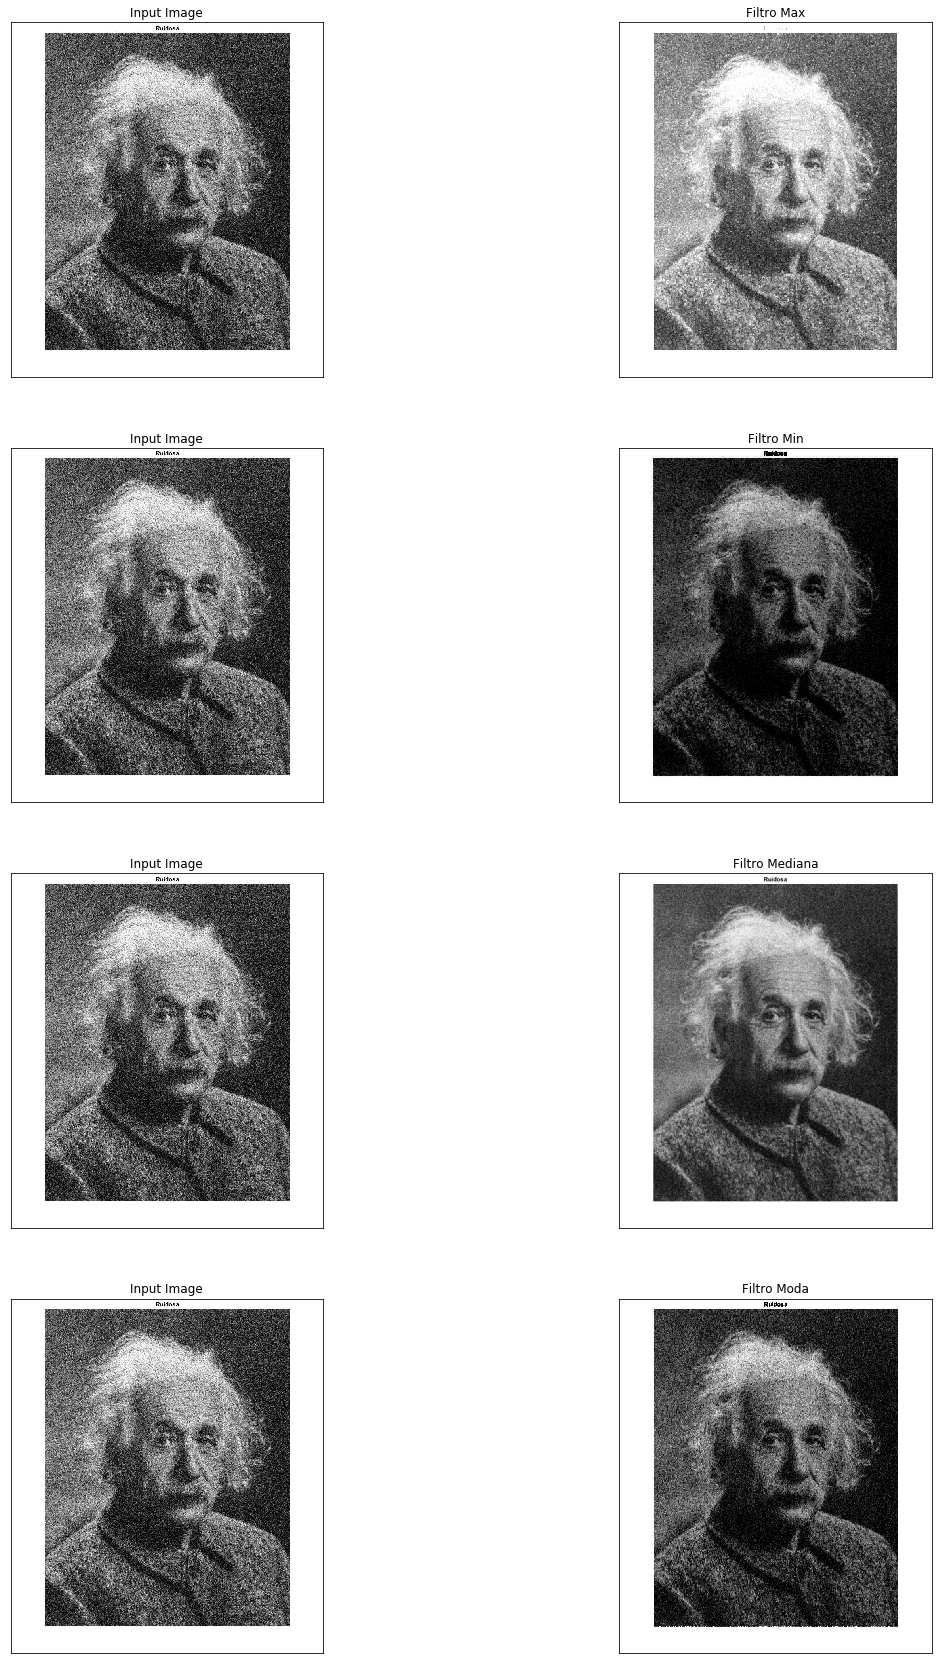

In [17]:
import numpy as np
import cv2
from scipy.stats import mode
from matplotlib import pyplot as plt

img = cv2.imread('ruido.jpg',0) # imagem tons de cinza
def median_filter(image,n):
    output = np.zeros_like(image)
    output = np.dstack((output,output,output,output))
    padded_x = image.shape[0] + (n- 1)
    padded_y = image.shape[1] + (n - 1)
    image_padded = np.zeros((padded_x,padded_y))
    w_x = int((n - 1)/2)
    w_y = int((n - 1)/2)
    image_padded[w_x:-w_x, w_y:-w_y] = image
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            y_end = y+n
            x_end = x+n
            output[x,y,0]=np.max(image_padded[x:x_end,y:y_end])
            output[x,y,1]=np.min(image_padded[x:x_end,y:y_end])
            output[x,y,2]=np.mean(image_padded[x:x_end,y:y_end])
            output[x,y,3]=mode(image_padded[x:x_end,y:y_end])[0][0][0]
    return output
gray_image = median_filter(img,3)

plt.figure(figsize=(20,30))
plt.subplot(421),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(gray_image[:,:,0], cmap = 'gray')
plt.title('Filtro Max'), plt.xticks([]), plt.yticks([])
plt.subplot(423),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(gray_image[:,:,1], cmap = 'gray')
plt.title('Filtro Min'), plt.xticks([]), plt.yticks([])
plt.subplot(425),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(gray_image[:,:,2], cmap = 'gray')
plt.title('Filtro Mediana'), plt.xticks([]), plt.yticks([])
plt.subplot(427),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(428),plt.imshow(gray_image[:,:,3], cmap = 'gray')
plt.title('Filtro Moda'), plt.xticks([]), plt.yticks([])
plt.show()

Filtros Espaciais Media e Gaussiano

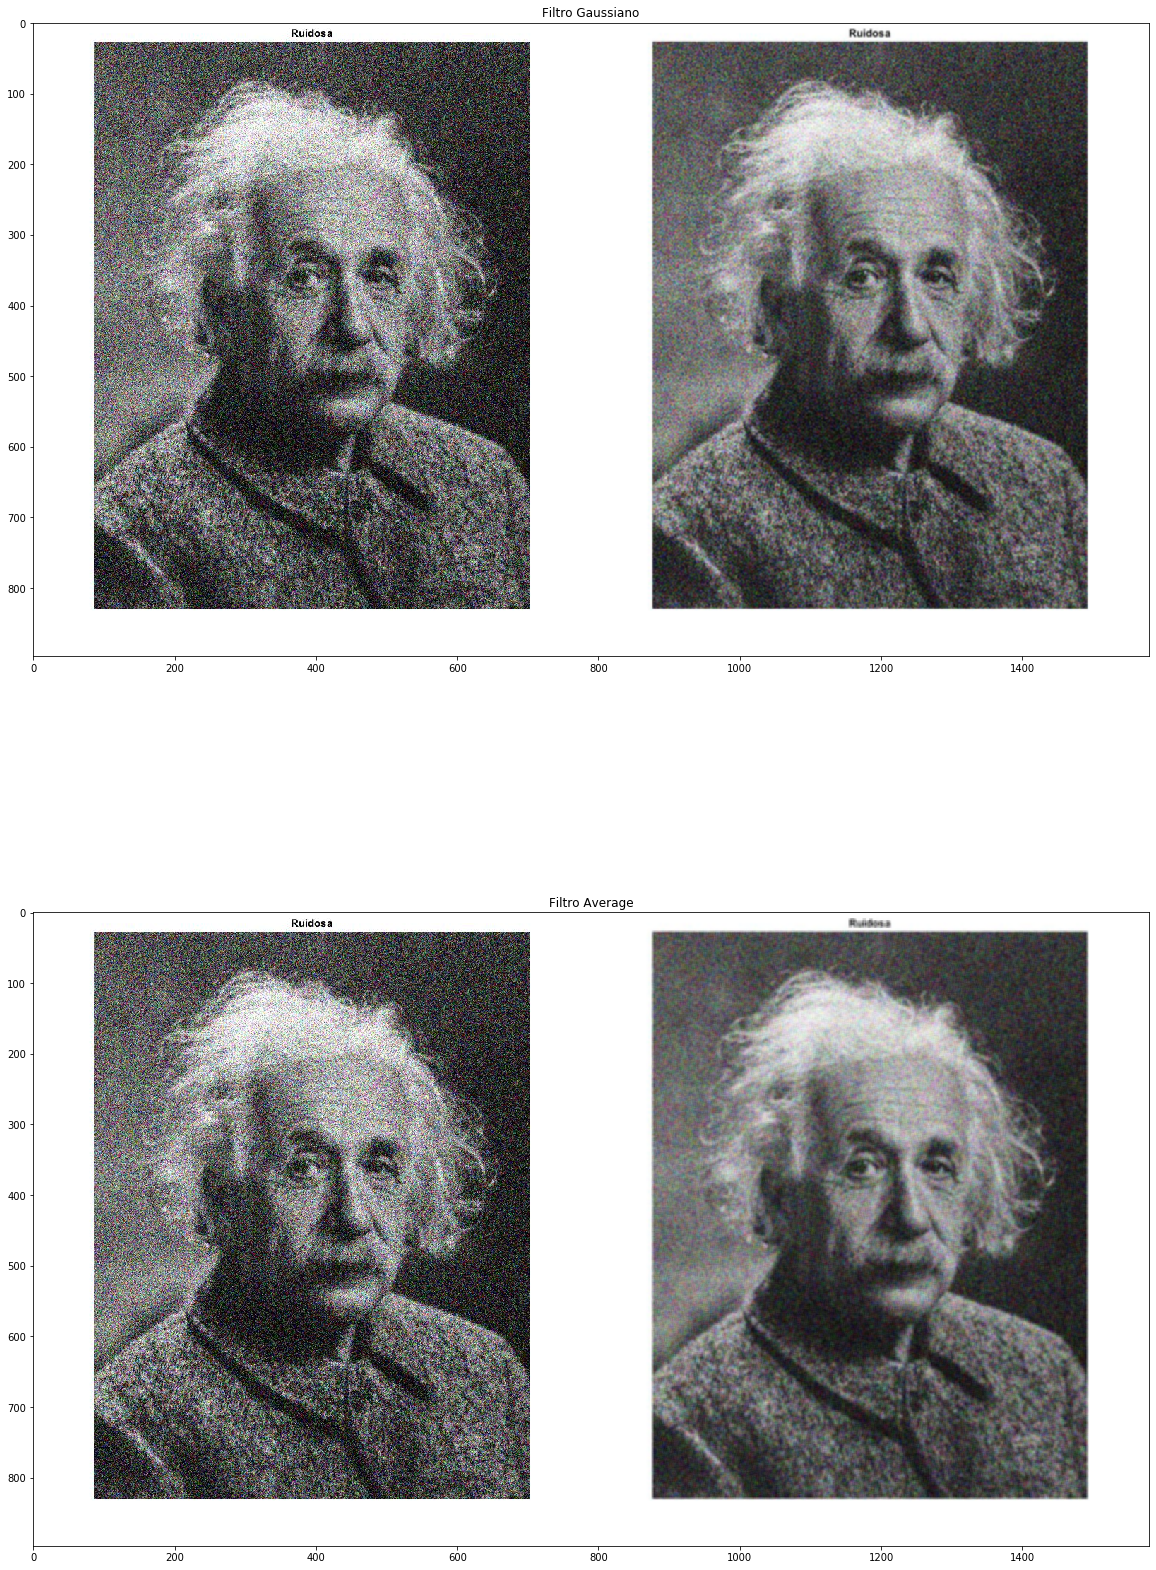

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('ruido.jpg')
gaussian = cv2.GaussianBlur(img,(5,5),0)
average = cv2.blur(img,(5,5))
compare = np.concatenate((img, gaussian), axis=1) 
plt.figure(figsize=(20,30))
plt.subplot(2,1,1)
plt.imshow(np.hstack((img, gaussian)), cmap = 'gray')
plt.title('Filtro Gaussiano')
plt.subplot(2,1,2)
plt.imshow(np.hstack((img, average)), cmap = 'gray')
plt.title('Filtro Average')
plt.show()

In [ ]:
Filtros Espaciais

Filtros detectores de bordas 

Laplaciano, Roberts e Sobel

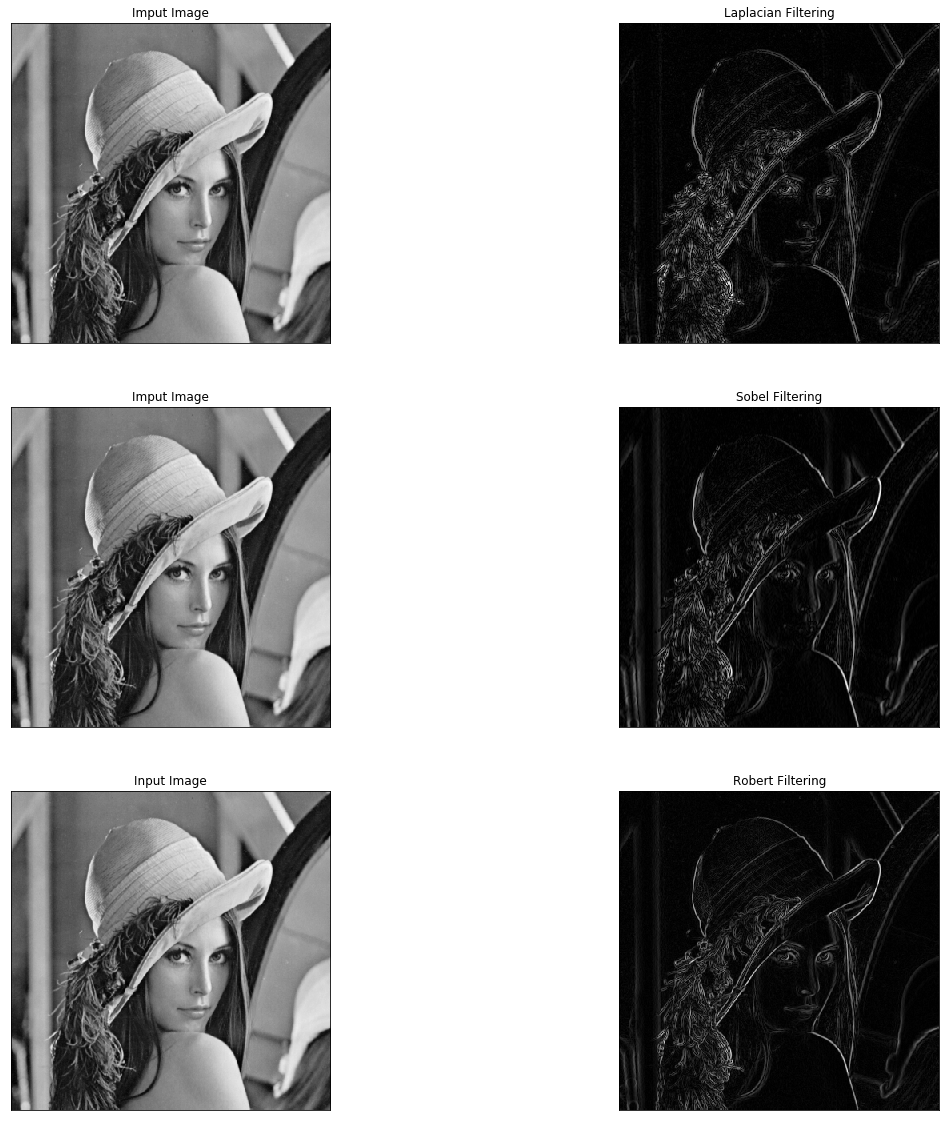

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import convolve

img = cv2.imread('Lena.pgm',0)

#laplaciano
Laplace = cv2.Laplacian(img,cv2.CV_64F,ksize=5)

#Sobel
Sobel = cv2.Sobel(img,cv2.CV_64F,1,0)

#Roberts

roberts_cross_v = np.array( [[ 1, 0 ],[ 0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],[ -1, 0 ]] )

def roberts_cross(imagem) :
    image = np.asarray(imagem,dtype="int32")
    vertical = convolve( image, roberts_cross_v )
    horizontal = convolve( image, roberts_cross_h )

    output_image = np.sqrt( np.square(horizontal) + np.square(vertical))

    return output_image


Roberts = roberts_cross(img)

plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Imput Image'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,2)
plt.imshow(abs(Laplace), cmap = 'gray')
plt.title('Laplacian Filtering'), plt.xticks([]), plt.yticks([])


plt.subplot(3,2,3)
plt.imshow(img, cmap = 'gray')
plt.title('Imput Image'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,4)
plt.imshow(abs(Sobel), cmap = 'gray')
plt.title('Sobel Filtering'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,5)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,6)
plt.imshow( abs(Roberts), cmap = 'gray')
plt.title('Robert Filtering'), plt.xticks([]), plt.yticks([])


plt.show()


Filtros na Frequencia

Passa Alta e Passa Baixa

Filtro Ideal,Butterworth e Gaussiano


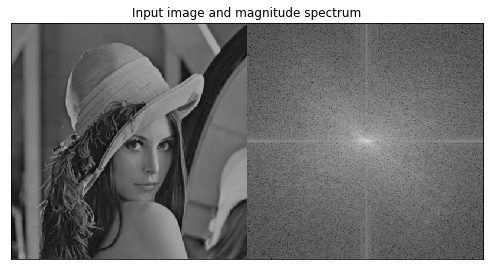

/home/joao/.local/share/virtualenvs/PDI-KW-fhQfR/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/home/joao/.local/share/virtualenvs/PDI-KW-fhQfR/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


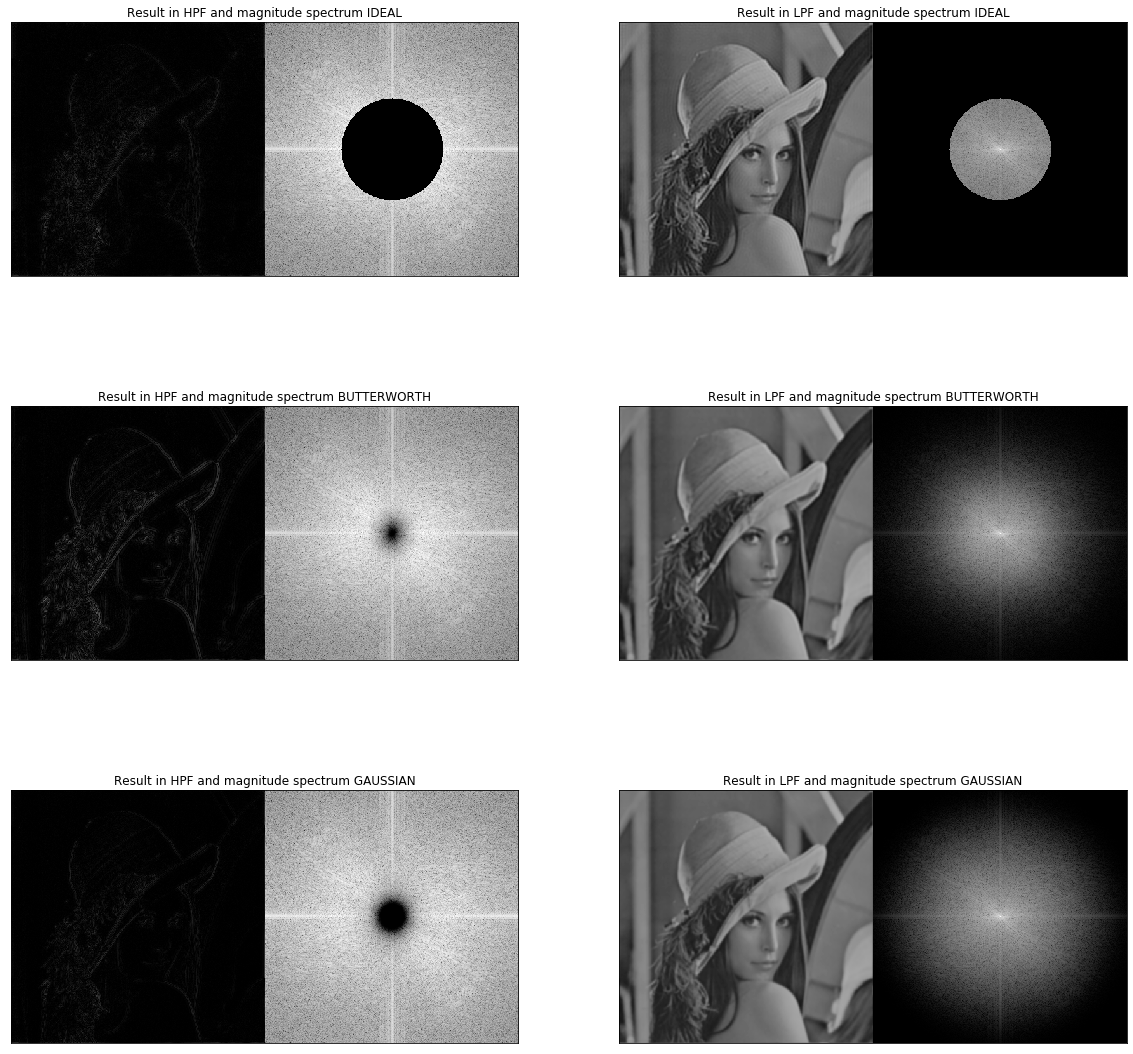

In [168]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
##plotando imagem
img = cv2.imread('Lena.pgm',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(1+np.abs(fshift))
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.imshow(np.hstack((img, magnitude_spectrum)), cmap = 'gray')
plt.title('Input image and magnitude spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
##filtro ideal
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
kernel = np.ones_like(fshift)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]

mask_area = (x-np.array(center)[0]) ** 2 + (y-np.array(center)[1]) ** 2 <= r*r
kernel[mask_area]=0

#butterworth filter

D0=50  #parametro D0
n=3    #ordem do filtro
D = np.sqrt((x-np.array(center)[0]) ** 2 + (y-np.array(center)[1]) ** 2) 


ButH = (1+ (np.sqrt(2)-1)*((D0/D)**(2*n)))**-1
ButL = (1+ (np.sqrt(2)-1)*((D/D0)**(2*n)))**-1
    
#Gaussian Filter

sigma=70
GasH = np.e**((sigma**2)/(-D**2 ))
GasL = np.e**((-D**2 )/(sigma**2))
#sinal filtrado
fshiftBH=fshift*ButH
fshiftBL=fshift*ButL

fshiftH=fshift*kernel
fshiftL=fshift*(1-kernel)

fshiftGH=fshift*GasH
fshiftGL=fshift*GasL

#magnitude

magnitude_spectrumH = 20*np.log(1+np.abs(fshiftH))
magnitude_spectrumL = 20*np.log(1+np.abs(fshiftL))

magnitude_spectrumBH = 20*np.log(1+np.abs(fshiftBH))
magnitude_spectrumBL = 20*np.log(1+np.abs(fshiftBL))


magnitude_spectrumGH = 20*np.log(1+np.abs(fshiftGH))
magnitude_spectrumGL = 20*np.log(1+np.abs(fshiftGL))


## ideal filtering
f_ishiftH = np.fft.ifftshift(fshiftH)
img_backH = np.fft.ifft2(f_ishiftH)
img_backH = np.abs(img_backH)

f_ishiftL = np.fft.ifftshift(fshiftL)
img_backL = np.fft.ifft2(f_ishiftL)
img_backL = np.abs(img_backL)
## butterworth filtering

f_ishiftBH = np.fft.ifftshift(fshiftBH)
img_backBH = np.fft.ifft2(f_ishiftBH)
img_backBH = np.abs(img_backBH)

f_ishiftBL = np.fft.ifftshift(fshiftBL)
img_backBL = np.fft.ifft2(f_ishiftBL)
img_backBL = np.abs(img_backBL)

## gaussian filtering
f_ishiftGH = np.fft.ifftshift(fshiftGH)
img_backGH = np.fft.ifft2(f_ishiftGH)
img_backGH = np.abs(img_backGH)

f_ishiftGL = np.fft.ifftshift(fshiftGL)
img_backGL = np.fft.ifft2(f_ishiftGL)
img_backGL = np.abs(img_backGL)



plt.figure(figsize=(20,20))
plt.subplot(3,2,1),plt.imshow(np.hstack((img_backH, magnitude_spectrumH)), cmap = 'gray')
plt.title('Result in HPF and magnitude spectrum IDEAL'),plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.imshow(np.hstack((img_backL, magnitude_spectrumL)), cmap = 'gray')
plt.title('Result in LPF and magnitude spectrum IDEAL'),plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(np.hstack((img_backBH, magnitude_spectrumBH)), cmap = 'gray')
plt.title('Result in HPF and magnitude spectrum BUTTERWORTH'),plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(np.hstack((img_backBL, magnitude_spectrumBL)), cmap = 'gray')
plt.title('Result in LPF and magnitude spectrum BUTTERWORTH'),plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6),plt.imshow(np.hstack((img_backGL, magnitude_spectrumGL)), cmap = 'gray')
plt.title('Result in LPF and magnitude spectrum GAUSSIAN'),plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5),plt.imshow(np.hstack((img_backGH, magnitude_spectrumGH)), cmap = 'gray')
plt.title('Result in HPF and magnitude spectrum GAUSSIAN'),plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
Passa faixa


butterworth e gaussiano


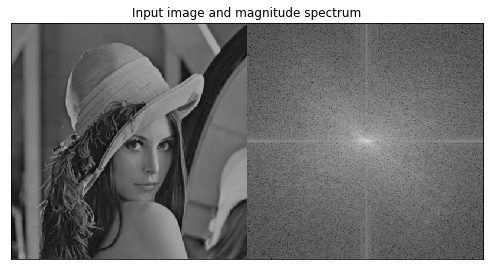

/home/joao/.local/share/virtualenvs/PDI-KW-fhQfR/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
/home/joao/.local/share/virtualenvs/PDI-KW-fhQfR/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide
/home/joao/.local/share/virtualenvs/PDI-KW-fhQfR/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in reciprocal


<function matplotlib.pyplot.show(*args, **kw)>

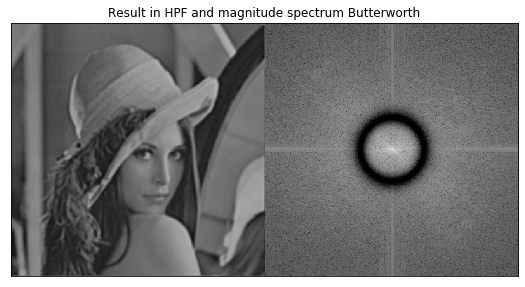

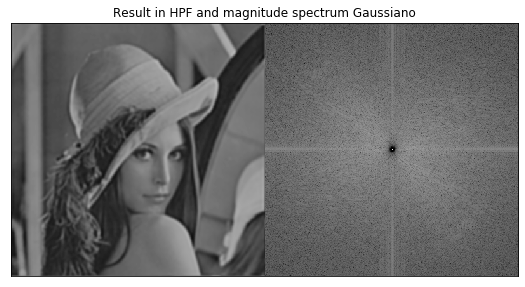

In [196]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##obtendo imagem e seu espectro

img = cv2.imread('Lena.pgm',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(1+np.abs(fshift))
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.imshow(np.hstack((img, magnitude_spectrum)), cmap = 'gray')
plt.title('Input image and magnitude spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


## criando kernel para filtro ideal

rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
kernel = np.ones_like(fshift)
fc = 50
W = 20
mask_area = np.logical_and((x-np.array(center)[0]) ** 2 + (y-np.array(center)[1]) ** 2 >= (fc-W/2)**2,(x-np.array(center)[0]) ** 2 + (y-np.array(center)[1]) ** 2 <= (fc+W/2)**2)
kernel[mask_area]=0
filtered = fshift*kernel
magfilt = 20*np.log(1+np.abs(filtered))


## recuperando filtro ideal

f_ishiftBP = np.fft.ifftshift(filtered)
img_backBP = np.fft.ifft2(f_ishiftBL)
img_backBP = np.abs(img_backBL)

## criando kernel para filtro butterworth

center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]

D = np.sqrt((x-np.array(center)[0])**2 + (y-np.array(center)[1])**2)
D0 = 50                                               ## parametro para fc
W=40                                                  ## parametro para largura de banda
n=3                                                   ## grau de convergencia do filtro
Butterworth = (1+(D*W/(D**2-D0**2))**(2*n))**-1

## criando kernel para filtro Gaussiano

D0 = 1                                                ## sigma
W = 40                                                ## banda

gauss = np.e**((-(D**2-D0**2)/(D*W))**-1)


## aplicando o filtro Butterworth e Gaussiano ao spectro da imagem
filteredBut = fshift*Butterworth             # filtro butterworth
filteredGaus = fshift*gauss                  # filtro gaussiano
filteredBut = fshift*Butterworth             # filtro ideal


## obtendo o valor filtro em decibels
magfiltB = 20*np.log(1+np.abs(filteredBut))  # magnitude da imagem filtrada BUTTERWORTH
magfiltG = 20*np.log(1+np.abs(filteredGaus))  # magnitude da imagem filtrada BUTTERWORTH


## aplicando a fft inversa em 2 dimensoes para recuperar a imagem filtrada
f_ishiftBPBut = np.fft.ifftshift(filteredBut)
img_backBPBut = np.fft.ifft2(f_ishiftBL)
img_backBPBut = np.abs(img_backBL)

f_ishiftBPGaus = np.fft.ifftshift(filteredGaus)
img_backBPGaus = np.fft.ifft2(f_ishiftBL)
img_backBPGaus = np.abs(img_backBL)





plt.figure(figsize=(20,20))
plt.subplot(3,2,1),plt.imshow(np.hstack((img_backBPBut, abs(magfiltB))), cmap = 'gray')
plt.title('Result in HPF and magnitude spectrum Butterworth'),plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,20))
plt.subplot(3,2,1),plt.imshow(np.hstack((img_backBPGaus, abs(magfiltG))), cmap = 'gray')
plt.title('Result in HPF and magnitude spectrum Gaussiano'),plt.xticks([]), plt.yticks([])
plt.show